In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# **Data Classification**

## **Importing Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **Data Loading & Inspection**

### **Reading Train Data**

In [3]:
House_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
House_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
House_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
House_train.shape

(1460, 81)

In [7]:
House_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
House_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### **Nulls for Train data**

In [9]:
House_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

To extract all columns which have Nulls :

In [10]:
for col in House_train.columns:
    if House_train[col].isnull().sum() != 0:
        print(f'{col} contain : ({House_train[col].isnull().sum()}) Null')

LotFrontage contain : (259) Null
Alley contain : (1369) Null
MasVnrType contain : (872) Null
MasVnrArea contain : (8) Null
BsmtQual contain : (37) Null
BsmtCond contain : (37) Null
BsmtExposure contain : (38) Null
BsmtFinType1 contain : (37) Null
BsmtFinType2 contain : (38) Null
Electrical contain : (1) Null
FireplaceQu contain : (690) Null
GarageType contain : (81) Null
GarageYrBlt contain : (81) Null
GarageFinish contain : (81) Null
GarageQual contain : (81) Null
GarageCond contain : (81) Null
PoolQC contain : (1453) Null
Fence contain : (1179) Null
MiscFeature contain : (1406) Null


To keep Id columns found becaue we need it for submission file:

In [11]:
Train_Id = House_train['Id'].copy()

To remove non important columns and columns which have more than 85% Nulls:

In [12]:
House_train = House_train.drop(['MiscFeature','Fence','PoolQC','Alley','Id'],axis=1)

In [13]:
for col in House_train.columns:
    if House_train[col].isnull().sum() != 0:
        print(f'{col} contain : ({House_train[col].isnull().sum()}) Null')

LotFrontage contain : (259) Null
MasVnrType contain : (872) Null
MasVnrArea contain : (8) Null
BsmtQual contain : (37) Null
BsmtCond contain : (37) Null
BsmtExposure contain : (38) Null
BsmtFinType1 contain : (37) Null
BsmtFinType2 contain : (38) Null
Electrical contain : (1) Null
FireplaceQu contain : (690) Null
GarageType contain : (81) Null
GarageYrBlt contain : (81) Null
GarageFinish contain : (81) Null
GarageQual contain : (81) Null
GarageCond contain : (81) Null


To remove Nulls at Numerical columns we use this code:

In [14]:
numeric_cols = House_train.select_dtypes(include=['int64','float64']).columns.tolist()

for col in numeric_cols:
    if col in House_train.columns:
        House_train[col].fillna(House_train[col].median(), inplace=True)

To remove Nulls at Categorical columns we use this code:

In [15]:
categorical_cols = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                    'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish',
                    'GarageQual']

for col in categorical_cols:
    if col in House_train.columns:
        # fill Nulls by mode
        most_frequent = House_train[col].mode()[0]
        House_train[col].fillna(most_frequent, inplace=True)

In [16]:
House_train['GarageCond'] = House_train['GarageCond'].astype(str).str.strip()

In [17]:
# replace nan by None
House_train['GarageCond'].replace('nan', 'None', inplace=True)

To check if there is found any Nulls at data:

In [18]:
Nulls_col = House_train.isnull().sum()
if Nulls_col.any():
    print(Nulls_col[Nulls_col != 0])
else:
    print('No Nulls Found')

No Nulls Found


### **Outliers for Train data**

Visualization by Boxplot to all Numerical Columns:

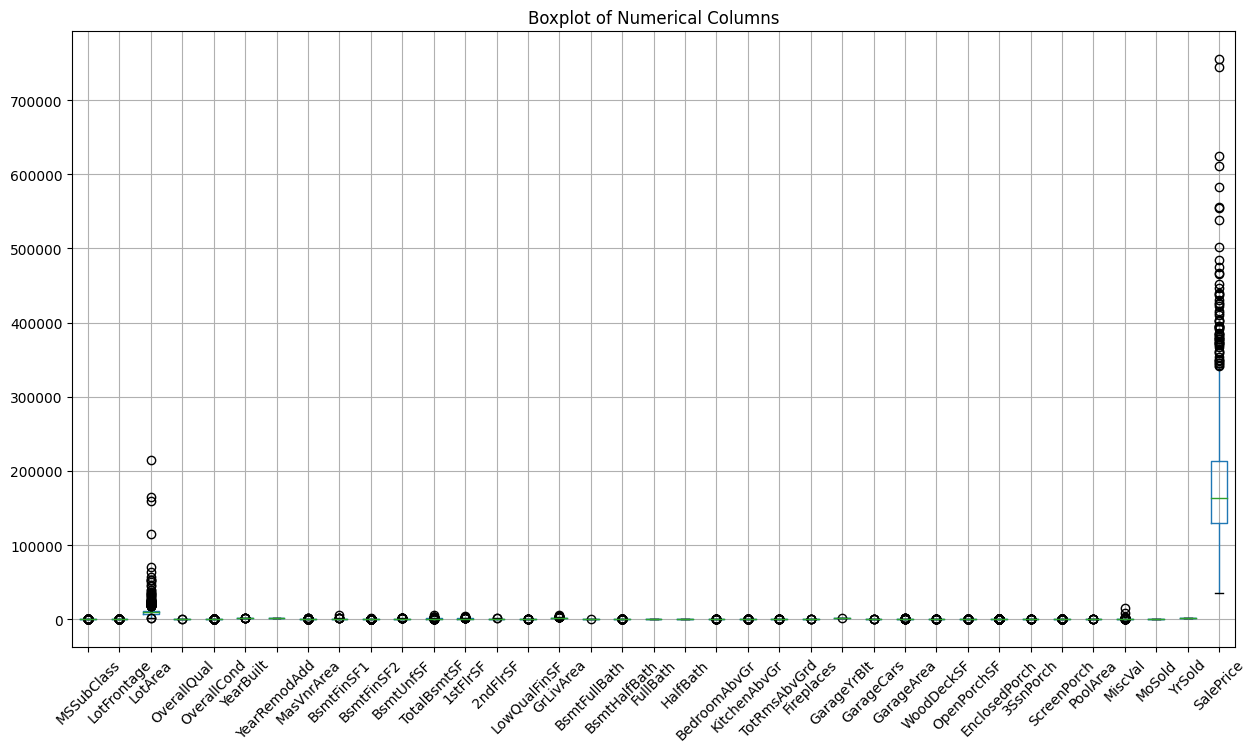

In [19]:
Numerical_columns = House_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

House_train[Numerical_columns].boxplot(figsize=(15,8), rot=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

To show outliers by using Boxplot of **LotFrontage**:

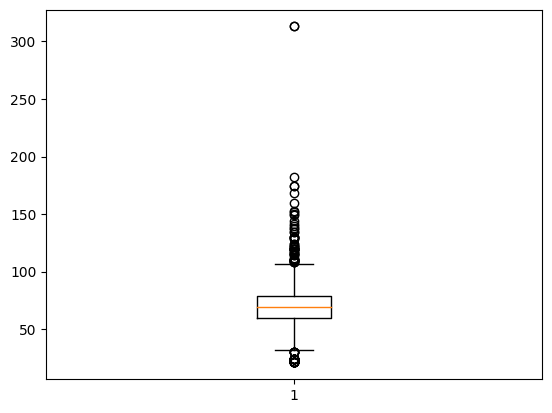

In [20]:
plt.boxplot(House_train['LotFrontage'])
plt.axis = ['equal']

To remove Outliers by using **IQR**:

In [21]:
x = 'LotFrontage'
q75,q25 = np.percentile(House_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (1.4  * IQR)
Lower = q25 - (1.5 *  IQR)
House_train.loc[House_train[x] < Lower,x ]= np.nan
House_train.loc[House_train[x] > Upper,x ]= np.nan

To rerplace Nan Outliers to median:

In [22]:
House_train['LotFrontage'].fillna(House_train['LotFrontage'].median(), inplace=True)

To show Boxplot to **LotFrontage** after removing Outliers:

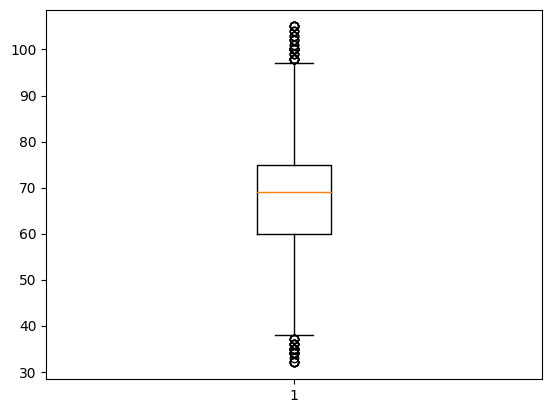

In [23]:
plt.boxplot(House_train['LotFrontage'])
plt.axis = ['equal']

To show outliers by using Boxplot of **SalePrice**:

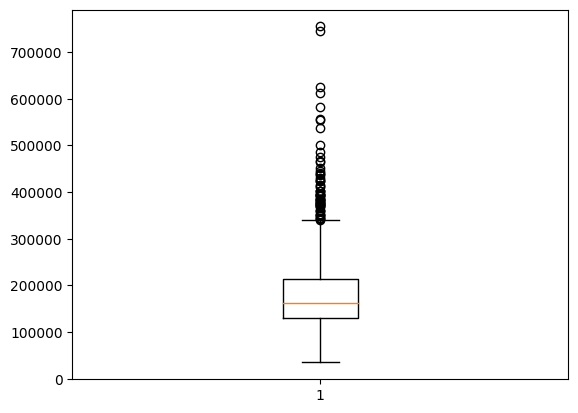

In [24]:
plt.boxplot(House_train['SalePrice'])
plt.axis = ['equal']

To remove Outliers by using **IQR:**

In [25]:
x = 'SalePrice'
q75,q25 = np.percentile(House_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (3.5  * IQR)
Lower = q25 - (1.5 *  IQR)
House_train.loc[House_train[x] < Lower,x ]= np.nan
House_train.loc[House_train[x] > Upper,x ]= np.nan

To rerplace Nan Outliers to median:

In [26]:
House_train['SalePrice'].fillna(House_train['SalePrice'].median(), inplace=True)


To show Boxplot to **SalePrice** after removing Outliers:

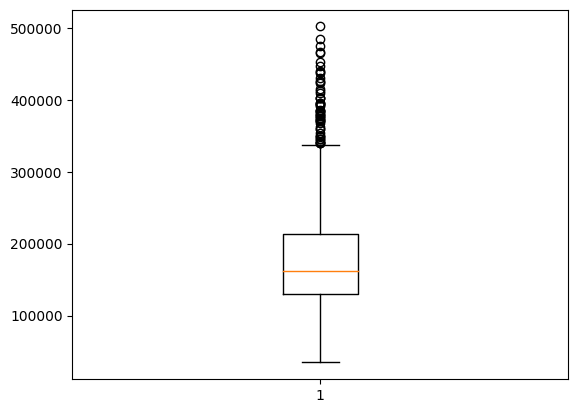

In [27]:
plt.boxplot(House_train['SalePrice'])
plt.axis = ['equal']

## **FeatureExtraction for Train data**

F**or Numerical values:**

In [28]:
Numerical_columns = House_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [29]:
print(Numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


For Extraxt **Categorical columns:**

In [30]:
Categorical_columns = House_train.select_dtypes(include=['object']).columns.tolist()

In [31]:
print(Categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


For extract unique values at evry feature:

In [32]:
for col in Categorical_columns:
    unique_values = House_train[col].unique()
    print(f'{col} ({len(unique_values)} values): {unique_values}')
    print('-'*50)

MSZoning (5 values): ['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------
Street (2 values): ['Pave' 'Grvl']
--------------------------------------------------
LotShape (4 values): ['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
LandContour (4 values): ['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------
Utilities (2 values): ['AllPub' 'NoSeWa']
--------------------------------------------------
LotConfig (5 values): ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
LandSlope (3 values): ['Gtl' 'Mod' 'Sev']
--------------------------------------------------
Neighborhood (25 values): ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
--------------------------------------

We use **LabelEncoder** for these features which have two unique values:

In [33]:
Lable_encoder = LabelEncoder()
Binary_cols = ['Street', 'CentralAir']
# Apply labelencoder
for col in Binary_cols:
    House_train[col] = Lable_encoder.fit_transform(House_train[col])

We use **OneHotEncoder** for this Features which have Low Cardinality:

In [34]:
onehot_cols = [
    'MSZoning','LotShape','LandContour','Utilities','LotConfig','LandSlope',
    'BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','Foundation',
    'Heating','Electrical','Functional','GarageFinish','PavedDrive','SaleType','SaleCondition']

existing_onehot_cols = [col for col in onehot_cols if col in House_train.columns]
House_train = pd.get_dummies(House_train, columns=existing_onehot_cols, drop_first=True)

We use **Ordinal Encoding** for these features which have arranged values:

In [35]:
ordinal_cols = {
    'ExterQual': {'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'ExterCond': {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'BsmtQual': {'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'BsmtCond': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4},
    'BsmtExposure': {'None':0,'No':1,'Mn':2,'Av':3,'Gd':4},
    'BsmtFinType1': {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'BsmtFinType2': {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'FireplaceQu': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'GarageQual': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'GarageCond': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4},
    'HeatingQC': {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'KitchenQual': {'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'GarageType': {'None':0, 'Basment':1 ,'2Types':2,'Detchd':3,'Attchd':4,'BuiltIn':5,'CarPort':6}
}

for col, mapping in ordinal_cols.items():
    if col in House_train.columns:
        House_train[col] = House_train[col].map(mapping)

Replace nan by mode:

In [36]:
House_train['GarageCond'].fillna(House_train['GarageCond'].mode()[0], inplace=True)

We use **Frequency Encoding** at these features which have large unique values:

In [37]:
high_card_cols = ['Neighborhood','Condition1','Condition2','Exterior1st','Exterior2nd']

for col in high_card_cols:
    if col in House_train.columns:
        freq = House_train[col].value_counts() / len(House_train)
        House_train[col] = House_train[col].map(freq)

In [38]:
House_train.shape

(1460, 136)

## **Splitting Data**

In [39]:
X = House_train.drop(['SalePrice'],axis=1)
y = House_train['SalePrice']

In [40]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1095, 135)
X_test shape is  (365, 135)
y_train shape is  (1095,)
y_test shape is  (365,)


## **Modeling**

In [41]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X_test)

In [42]:
# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [43]:
y_test[:10]

1140    139000.0
132     150750.0
642     345000.0
952     133900.0
1297    140000.0
1399    137450.0
360     156000.0
849     187000.0
1073    159500.0
1057    248000.0
Name: SalePrice, dtype: float64

In [44]:
y_pred[:10]

array([136732.22, 148571.11, 343349.2 , 133689.22, 142936.4 , 141139.05,
       152562.02, 182526.05, 162233.22, 240654.38], dtype=float32)

## **Evaluation**

In [45]:
# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# R2 Score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Adjusted R2
n_train = len(y_train)
n_test = len(y_test)
p = X_train.shape[1]

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")
print(f"Train Adjusted R2: {adj_r2_train:.4f}")
print(f"Test Adjusted R2: {adj_r2_test:.4f}")

Train RMSE: 4356.5786717852525
Test RMSE: 4843.395313935839
Train R2: 0.9963080731373575
Test R2: 0.9956538610621822
Train Adjusted R2: 0.9958
Test Adjusted R2: 0.9931


### **Visualization**

Visualizing Learning Curve for XGBoost Regressor to detect overfitting/underfitting:

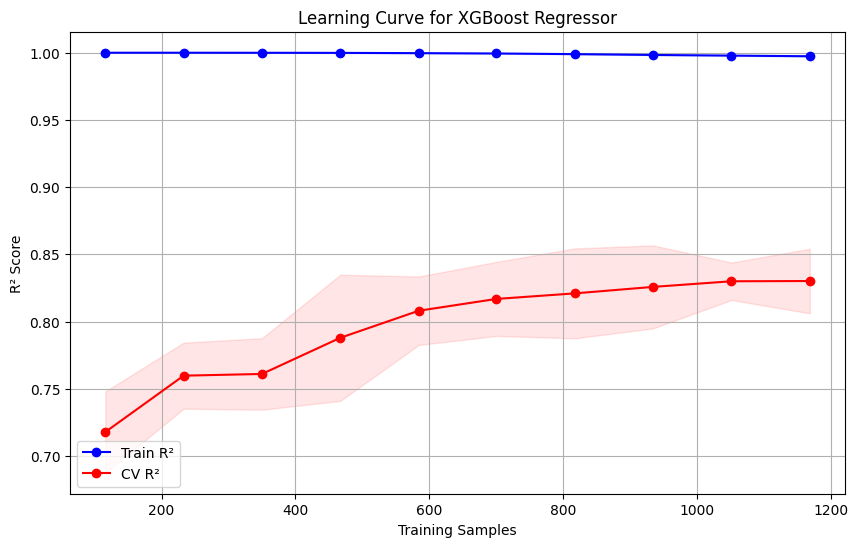

In [46]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# mean and standard deviation to scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train R²')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='CV R²')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

plt.title('Learning Curve for XGBoost Regressor')
plt.xlabel('Training Samples')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Scatter plot: Actual vs Predicted:

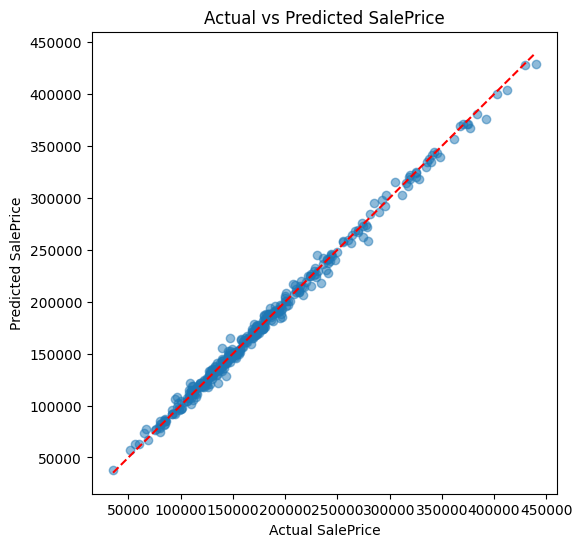

In [47]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

### **Reading Test Data**

In [48]:
House_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [49]:
House_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [50]:
House_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [51]:
House_test.shape

(1459, 80)

In [52]:
House_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [53]:
House_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### **Nulls Test data**

In [54]:
House_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

To extract all columns which have Nulls :

In [55]:
for col in House_test.columns:
    if House_test[col].isnull().sum() != 0:
        print(f'{col} contain : ({House_test[col].isnull().sum()}) Null')

MSZoning contain : (4) Null
LotFrontage contain : (227) Null
Alley contain : (1352) Null
Utilities contain : (2) Null
Exterior1st contain : (1) Null
Exterior2nd contain : (1) Null
MasVnrType contain : (894) Null
MasVnrArea contain : (15) Null
BsmtQual contain : (44) Null
BsmtCond contain : (45) Null
BsmtExposure contain : (44) Null
BsmtFinType1 contain : (42) Null
BsmtFinSF1 contain : (1) Null
BsmtFinType2 contain : (42) Null
BsmtFinSF2 contain : (1) Null
BsmtUnfSF contain : (1) Null
TotalBsmtSF contain : (1) Null
BsmtFullBath contain : (2) Null
BsmtHalfBath contain : (2) Null
KitchenQual contain : (1) Null
Functional contain : (2) Null
FireplaceQu contain : (730) Null
GarageType contain : (76) Null
GarageYrBlt contain : (78) Null
GarageFinish contain : (78) Null
GarageCars contain : (1) Null
GarageArea contain : (1) Null
GarageQual contain : (78) Null
GarageCond contain : (78) Null
PoolQC contain : (1456) Null
Fence contain : (1169) Null
MiscFeature contain : (1408) Null
SaleType cont

To keep Id columns found becaue we need it for submission file:

In [56]:
Test_Id = House_test['Id'].copy()

To remove non important columns and columns which have more than 85% Nulls:

In [57]:
House_test = House_test.drop(['MiscFeature','Fence','PoolQC','Alley','Id'],axis=1)

In [58]:
for col in House_test.columns:
    if House_test[col].isnull().sum() != 0:
        print(f'{col} contain : ({House_test[col].isnull().sum()}) Null')

MSZoning contain : (4) Null
LotFrontage contain : (227) Null
Utilities contain : (2) Null
Exterior1st contain : (1) Null
Exterior2nd contain : (1) Null
MasVnrType contain : (894) Null
MasVnrArea contain : (15) Null
BsmtQual contain : (44) Null
BsmtCond contain : (45) Null
BsmtExposure contain : (44) Null
BsmtFinType1 contain : (42) Null
BsmtFinSF1 contain : (1) Null
BsmtFinType2 contain : (42) Null
BsmtFinSF2 contain : (1) Null
BsmtUnfSF contain : (1) Null
TotalBsmtSF contain : (1) Null
BsmtFullBath contain : (2) Null
BsmtHalfBath contain : (2) Null
KitchenQual contain : (1) Null
Functional contain : (2) Null
FireplaceQu contain : (730) Null
GarageType contain : (76) Null
GarageYrBlt contain : (78) Null
GarageFinish contain : (78) Null
GarageCars contain : (1) Null
GarageArea contain : (1) Null
GarageQual contain : (78) Null
GarageCond contain : (78) Null
SaleType contain : (1) Null


For **Numerical values**:

In [59]:
Numerical_columns = House_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(Numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


For **Categorical values:**

In [60]:
Categorical_columns = House_test.select_dtypes(include=['object']).columns.tolist()
print(Categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


To remove Nulls at Numerical columns we use this code:

In [61]:
numeric_cols = House_test.select_dtypes(include=['int64','float64']).columns.tolist()

for col in numeric_cols:
    if col in House_test.columns:
        House_test[col].fillna(House_test[col].median(), inplace=True)

To remove Nulls at Categorical columns we use this code:

In [62]:
categorical_cols = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','MSZoning',
                    'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','Utilities',
                    'GarageQual','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']

for col in categorical_cols:
    if col in House_test.columns:
        # fill Nulls by mode
        most_frequent = House_test[col].mode()[0]
        House_test[col].fillna(most_frequent, inplace=True)

In [63]:
House_test['GarageCond'] = House_test['GarageCond'].astype(str).str.strip()

In [64]:
# replace nan by None
House_test['GarageCond'].replace('nan', 'None', inplace=True)

To check if there is found any Nulls at data:

In [65]:
Nulls_col = House_test.isnull().sum()
if Nulls_col.any():
    print(Nulls_col[Nulls_col != 0])
else:
    print('No Nulls Found')

No Nulls Found


## **FeatuerExtraction for Test data**

In [66]:
for col in Categorical_columns:
    unique_values = House_test[col].unique()
    print(f'{col} ({len(unique_values)} values): {unique_values}')
    print('-'*50)

MSZoning (5 values): ['RH' 'RL' 'RM' 'FV' 'C (all)']
--------------------------------------------------
Street (2 values): ['Pave' 'Grvl']
--------------------------------------------------
LotShape (4 values): ['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
LandContour (4 values): ['Lvl' 'HLS' 'Bnk' 'Low']
--------------------------------------------------
Utilities (1 values): ['AllPub']
--------------------------------------------------
LotConfig (5 values): ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
--------------------------------------------------
LandSlope (3 values): ['Gtl' 'Mod' 'Sev']
--------------------------------------------------
Neighborhood (25 values): ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
-----------------------------------------------

We use **LabelEncoding (binary columns)** for these features which have two unique values:

In [67]:
binary_map = {
    'Street': {'Pave': 1, 'Grvl': 0},
    'CentralAir': {'Y': 1, 'N': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0}}

for col, mapping in binary_map.items():
    if col in House_test.columns:
        House_test[col] = House_test[col].map(mapping)

We use **One-Hot Encoding (nominal categorical columns)** for this Features which have Low Cardinality:

In [68]:
onehot_cols = [
    'MSZoning','LotShape','LandContour','Utilities','LotConfig','LandSlope',
    'BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','Foundation',
    'Heating','Electrical','Functional','GarageFinish','PavedDrive','SaleType','SaleCondition']

existing_onehot_cols = [col for col in onehot_cols if col in House_test.columns]
House_test = pd.get_dummies(House_test, columns=existing_onehot_cols, drop_first=[False])

We use **Ordinal Encoding (ordered quality columns)** for these features which have arranged values:

In [69]:
ordinal_cols = {
    'ExterQual': {'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'ExterCond': {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'BsmtQual': {'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'BsmtCond': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4},
    'BsmtExposure': {'None':0,'No':1,'Mn':2,'Av':3,'Gd':4},
    'BsmtFinType1': {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'BsmtFinType2': {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6},
    'FireplaceQu': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'GarageCond': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'GarageQual': {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4},
    'HeatingQC': {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},
    'KitchenQual': {'Fa':1,'TA':2,'Gd':3,'Ex':4},
    'GarageType': {'None':0, 'Basment':1 ,'2Types':2,'Detchd':3,'Attchd':4,'BuiltIn':5,'CarPort':6}
}

for col, mapping in ordinal_cols.items():
    if col in House_test.columns:
        House_test[col] = House_test[col].map(mapping)

In [70]:
House_test['GarageCond'].fillna(House_test['GarageCond'].mode()[0], inplace=True)

We use **Frequency Encoding** at these features which have large unique values:

In [71]:
high_card_cols = ['Neighborhood','Condition1','Condition2','Exterior1st','Exterior2nd']

for col in high_card_cols:
    if col in House_test.columns:
        freq = House_test[col].value_counts() / len(House_train)
        House_test[col] = House_test[col].map(freq)

In [72]:
House_test.shape

(1459, 126)

## **Prediction**

In [73]:
House_test = House_test.reindex(columns = X.columns ,fill_value=0)

In [74]:
Predictions = xgb_model.predict(House_test)

## **Submission**

In [75]:
#submission = pd.DataFrame({
submission = pd.DataFrame({
    'Id': Test_Id,
    'SalePrice': Predictions})

In [76]:
print(Predictions[:5])

[128649.12 156602.11 181899.31 184651.75 184625.75]


In [77]:
submission.to_csv('submission.csv', index = False)